In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import sklearn.metrics as skm

import keras.utils
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('WBK_credito.csv')
df

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,999,1,0,0,0
996,834,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,999,1,1,0,1
997,234,18,0,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,474,6,0,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


### Tratamento de dados

In [3]:
#substituindo valores NaN ou valores não existentes pela moda

df['Emprego'].fillna(3.0,inplace=True)
df['ResidenciaDesde'].fillna(4.0,inplace=True)
df['Habitacao'].fillna(1.0,inplace=True)
df.loc[df['HistoricoCredito'] == 0, 'HistoricoCredito'] = 2
df.loc[df['Profissao'] == 999, 'Profissao'] = 4

In [4]:
#removendo uma coluna que não será relevante para a ciração do modelo
df.drop(columns=['IDCREDITO'], inplace=True)

In [ ]:
df

-----------------------------------------------------------------

### Criando e treinando o modelo preditivo

In [5]:
#separando 30% das linhas do dataframe para teste
previsores = df.iloc[:,0:18].values
classe = df.iloc[:,18].values

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=0)

In [6]:
#criando e treinando o modelo

modelo = Sequential()
modelo.add(Dense(units=18, input_dim=18, activation='relu'))
modelo.add(Dense(units=12, activation='relu'))
modelo.add(Dense(units=1, activation='sigmoid'))

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo.fit(X_treinamento, y_treinamento, batch_size=10, epochs=100)



Epoch 1/100


70/70 [==============================] - 2s 2ms/step - loss: 13.1727 - accuracy: 0.5971
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 1.3200 - accuracy: 0.6200
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 1.6431 - accuracy: 0.5829
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.9384 - accuracy: 0.6286
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 1.3068 - accuracy: 0.6371
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.6486
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.9541 - accuracy: 0.6457
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 0.9180 - accuracy: 0.6586
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 1.2622 - accuracy: 0.6114
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.6429
Epoc

70/70 [==============================] - 0s 2ms/step - loss: 0.7744 - accuracy: 0.6657
Epoch 75/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6871
Epoch 76/100
70/70 [==============================] - 0s 2ms/step - loss: 0.8685 - accuracy: 0.6657
Epoch 77/100
70/70 [==============================] - 0s 2ms/step - loss: 0.9433 - accuracy: 0.6543
Epoch 78/100
70/70 [==============================] - 0s 2ms/step - loss: 0.7600 - accuracy: 0.6700
Epoch 79/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.6771
Epoch 80/100
70/70 [==============================] - 0s 2ms/step - loss: 0.7274 - accuracy: 0.6614
Epoch 81/100
70/70 [==============================] - 0s 2ms/step - loss: 0.9729 - accuracy: 0.6500
Epoch 82/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.6643
Epoch 83/100
70/70 [==============================] - 0s 2ms/step - loss: 0.8815 - accuracy: 0.6600
Epoch 84/100


In [7]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 12)                228       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 583 (2.28 KB)
Trainable params: 583 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#rodando o modelo com nosso conjunto de dados para teste
previsoes = modelo.predict(X_teste)
previsoes

10/10 [==============================] - 0s 3ms/step


array([[0.8486098 ],
       [0.33502302],
       [0.72344565],
       [0.15144908],
       [0.7271642 ],
       [0.4133082 ],
       [0.5020164 ],
       [0.4929317 ],
       [0.25487563],
       [0.88461965],
       [0.3134915 ],
       [0.74205285],
       [0.29230982],
       [0.6087348 ],
       [0.42859614],
       [0.02403479],
       [0.11518337],
       [0.70005554],
       [0.554026  ],
       [0.47229826],
       [0.6675727 ],
       [0.80535835],
       [0.42978212],
       [0.4372568 ],
       [0.6583876 ],
       [0.12022979],
       [0.7394605 ],
       [0.72834045],
       [0.74512124],
       [0.8457857 ],
       [0.6688256 ],
       [0.48265138],
       [0.44202143],
       [0.7135984 ],
       [0.4620609 ],
       [0.5375145 ],
       [0.7223923 ],
       [0.7637496 ],
       [0.47706342],
       [0.7822465 ],
       [0.6122511 ],
       [0.44729087],
       [0.6176801 ],
       [0.49337268],
       [0.7297541 ],
       [0.8111621 ],
       [0.7980547 ],
       [0.893

In [9]:
#convertendo as previsoes para 0 ou 1
previsoes_binario = (previsoes > 0.5).astype(int)
previsoes_binario

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

### Analisando algumas métricas do modelo e seu desempenho

In [10]:
confusao = confusion_matrix(y_teste, previsoes_binario)
confusao

array([[ 41,  34],
       [ 69, 156]], dtype=int64)

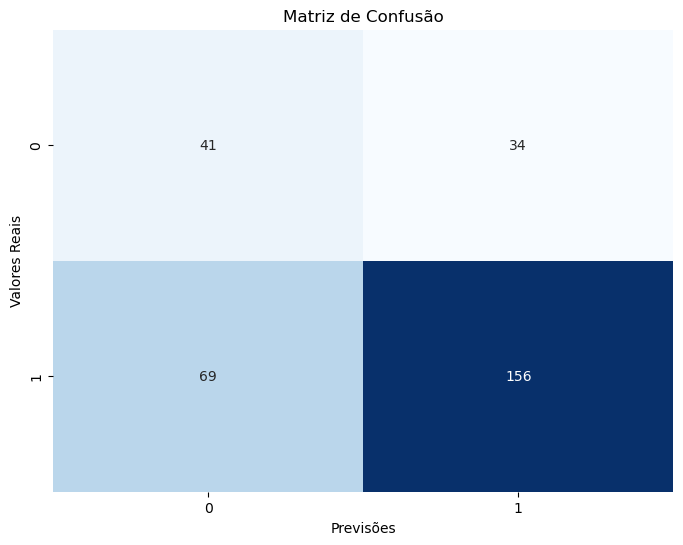

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [16]:
#a acurácia do modelo representa sua taxa de acerto ao classificar um conjunto de clientes novos

#acurácia = (VP + VN) / (VP + VN + FP + FN) = (40 + 68) / (40 + 68 + 7 + 185)
taxa_acerto = accuracy_score(y_teste, previsoes_binario)
round(taxa_acerto,2)

0.66

In [13]:
#sua precisão é boa para determinar bons pagantes
#Precisão = VP / (VP + FP) = 40/(40+7)

precisao = precision_score(y_teste, previsoes_binario)
print(round(precisao, 2)) 

0.82


In [18]:
#recall é a capacidade do modelo de identificar bons pagantes dentre todos os reais pagantes
#recall = VP / (VP + FN) 
recall = 156/(156+69)
round(recall,2)

0.69

In [21]:
#F1-Score gera uma noção geral do modelo. Quanto mais próximo de 1, melhor o desempenho dele
f1_score = 2 * (precisao * recall) / (precisao + recall)
round(f1_score,2)

0.75

In [14]:
#a taxa de inadimplência atingiu a meta solicitada
taxa_inad = 31/(31+169)
print(round(taxa_inad*100, 2), '%')

15.5 %


### Conclusão: o modelo possui um bom desempenho ao classificar um cliente como 'mau pagante', ficando com 66% de acurácia. Contudo, o modelo é excelente em classificar um cliente como 'bom pagante', com 82% de precisão. A taxa de inadimplência foi reduzida para 15.5%, atingindo a meta solicitada pela empresa